# Graph Lab

## Header information:

  - Author #1: Stanley Nguyen (nguyes44@mcmaster.ca)
  - Author #2: Arvind Shastri (shasta2@mcmaster.ca) (owner)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/shasta2/l1-graph-lab.git
  - Avenue to Learn group name: 48 

### Importing Required Modules

This cell imports all required modules related to this library, including appending the relative paths of the relevant modules to sys.path, and declaring the location of the dataset.

In [1]:
import sys

sys.path.append('.\src\Graph_Builder')
sys.path.append('.\src\Metric_Extractor')
sys.path.append('.\_dataset')

from CsvLine import csvReaderLines
from CsvStation import csvReaderStations
from CsvConnection import csvReaderConnections
from GraphBuilder import GraphBuilder
from MetricExtractor import MetricExtractor
from Dijkstra import Dijkstra
from A_Star import A_Star

londonLines = "_dataset/london.lines.csv"
londonStations = "_dataset/london.stations.csv"
londonConnections = "_dataset/london.connections.csv"

tempStations = csvReaderStations(londonStations)
tempLines = csvReaderLines(londonLines)
tempConnections = csvReaderConnections(londonConnections, tempLines, tempStations)

### Graph Generation

A list of stations, lines and connections are generated from the given .CSV files, and used as input to declare the GraphBuilder object.
The graph is then loaded with this information, and stores relevant info pertaining to the graph within this object.


In [2]:
tempStations = csvReaderStations(londonStations)
tempLines = csvReaderLines(londonLines)
tempConnections = csvReaderConnections(londonConnections, tempLines, tempStations)

graph = GraphBuilder(tempStations, tempLines, tempConnections)
graph.load_graph()

### Metric Extractor: Metrics

A `MetricExtractor` object is declared that allows us to compute metrics and analyze shortest path using various algorithms. Only the pertinent or required metrics to be measured are imported, and used as input to the MetricExtractor's `compute_metric` function.

In [3]:
analyzer = MetricExtractor(graph)

from ConnectionNumber import ConnectionNumber
analyzer.compute_metric(ConnectionNumber())

# from DegreePerNode import DegreePerNode
# temp = metric.compute_metric(DegreePerNode())

# from AverageDegree import AverageDegree
# metric.compute_metric(AverageDegree())

from DegreePerStation import DegreePerStation
analyzer.compute_metric(DegreePerStation())

{10: 1, 2: 191, 4: 43, 8: 4, 3: 15, 7: 2, 1: 24, 6: 16, 5: 5, 12: 1}

### Metric Extractor: Algorithms

The `MetricExtractor` object is given an algorithm to compute shortest path between two given nodes, as station IDs. A threshold of how much leeway time the user would like can also be set.

#### Dijkstra

In [5]:
analyzer._strategy = Dijkstra()
analyzer.algorithm('11', '131')
analyzer.print_output()

Dijkstra:  ['11', '163', '82', '193', '218', '283', '147', '150', '227', '101', '110', '265', '1', '234', '176', '30', '190', '131'] 

Stations             Line                           Line Number          Time      
---------------------------------------------------------------------------------
11 --> 163           Bakerloo Line                  1                    1         
163 --> 82           Bakerloo Line                  1                    2         
82 --> 193           Bakerloo Line                  1                    3         
193 --> 218          Hammersmith & City Line        6                    1         
218 --> 283          Hammersmith & City Line        6                    2         
283 --> 147          Hammersmith & City Line        6                    2         
147 --> 150          Hammersmith & City Line        6                    1         
150 --> 227          Hammersmith & City Line        6                    2         
227 --> 101          Hammer

#### A*

In [6]:
analyzer._strategy = A_Star()
analyzer.algorithm('11', '200')
analyzer.set_threshold(1)
analyzer.print_output()

A*:  ['11', '28', '192', '259', '126', '48', '250', '13', '156', '24', '164', '33', '36', '289', '200'] 

Stations             Line                           Line Number          Time      
---------------------------------------------------------------------------------
11 --> 28            Jubilee Line                   7                    2         
28 --> 192           Central Line                   2                    1         
192 --> 259          Central Line                   2                    2         
259 --> 126          Central Line                   2                    2         
126 --> 48           Central Line                   2                    1         
48 --> 250           Central Line                   2                    2         
250 --> 13           Central Line                   2                    2         
13 --> 156           Central Line                   2                    2         
156 --> 24           Central Line                   2   

### Distribution of Nodes' Degrees

A `pyplot` of the node degree vs frequency is plotted below, using the information from the graph.

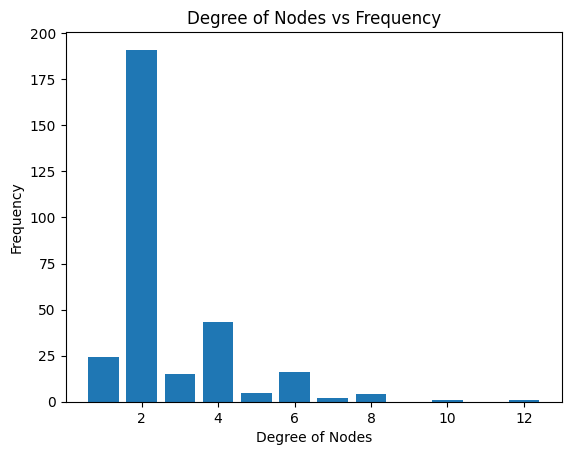

Degree of Nodes vs Frequency Values:  {10: 1, 2: 191, 4: 43, 8: 4, 3: 15, 7: 2, 1: 24, 6: 16, 5: 5, 12: 1}


In [7]:
from Plotter import Plotter
analyzer.compute_metric(Plotter())

### temporary design choices section
- benchmarks

- connection info is its own class because that allows us to compact the connection class and treat the connection more as a traditional edge that contains two connecting nodes. Adding more information to an edge does not modify the connection class, which ties into single responsibility, open-closed principle?
- graph is depicted via adjacency matrix because it allows us to access our neighbours more quickly (?) compared to an adjacency list, which is helpful for what we want to do with our graph such as compute shortest path.

-------

- [done] plotter
- [DONE] graph builder class focuses on producing a graph given the dataset with the use of helper functions.
- [DONE] ### line, station, and connection have been chosen to have their own classes because this design follows the single responsibility principle. A single file does not have to worry about information of both lines and station, and instead has the sole purpose of depicting the properties of one individual thing.
- [DONE] our algorithms are in seperate files to incorporate the strategy / factory design pattern (?)
- [DONE] we include each metric extraction in seperate files to follow the open-closed principle. If one were to want another metric measured, we would not have to modify existing code and instead add onto our codebase.
- [DONE] in SP algorithms, we do not return the absolute shortest path in terms of time. Instead, we have a tolerable threshhold time that one can "lose" to remain on the same line.
- [DONE] in the case where we run the code in the same cell multiple times without clearing the kernel, we acknoledged the potential for our code to be ran on the existing information from the previous run and the code simply adds onto existing information. For example, our number of stations would begin at 302 stations, but then running n times without refreshing kernel, we'd have n*302 stations. This was a significant issue for us because we envisioned a scenario where a user would use our library in an app, but would need to run a part of the library twice. Typically, users would not want to relaunch the application to redo an operation (which we saw as not wanting to refresh the kernel). Thus, we needed to check if the information (ex. stations, edges) were not redundant.

## Design Choices

The file structure of this library is separated into `src`, which holds the `Graph_Builder` and `Metric_Extractor` modules; `_dataset`, which holds the raw data in `.csv` files; and `Benchmarking`, which holds files pertinent to testing and benchmarking. 

Throughout the library, classes and functions are separated into their own files to follow the **single responsibility SOLID principle**. This allows a single file to focus solely on its responsibility and not unnecessarily depend or rely on the information of another file that is not needed. For example, Metric_Extractor imports ConnectionNodes() as a metric only when needed, and does not take up extra space (?). Each class and function definition has the sole purpose of depicting the properties of itself; dependencies are only listed when necessary.

##### Analyzing .csv Files and Graph_Builder

The given dataset was chosen to be stored as Station, Line and Connection objects, rather than storing individual values. By condensing the headers of the .csv files into these objects, **it allows for the code to be expandable, flexible and organized.** All information related to the stations are stored as attributes inside a Station object, and similarly for Line and Connection. Getters are placed to easily access each object's attributes.

This design keeps in mind that the .csv files are subject to change, whether that be reordering the columns or adding additional information. The objects made from these datasets are stored such that the Graph_Builder module only need the objects themselves to be able to generate a graph. In other words, the code is flexible and allows the user to provide a common ground for the module to organize the data into interpretable information. Setters were not commonly implemented because of the lack of necessity for this specific example, although the design can easily be adjusted to accomodate for this (open for extension).

The `Graph_Builder` module focuses on producing a graph given the dataset. It uses defined helper functions to add stations and connections to the graph, and load this information into an **adjacency list.** In comparison to an adjacency matrix, the adjacency list ___. 

##### Plotter

We assumed that the pyplot of the graph should be bundled into the Metric_Extractor module as a Concrete Strategy (Concrete Metric). We provided this implementation to further reinforce the Strategy pattern and the single responsibility principle. 


##### Strategy Pattern and Metric_Extractor

The Strategy design pattern was utilized to compute metrics, as well as use algorithms. This design pattern allows us to define a certain family of algorithms and metrics, and insert/call/swap them at runtime when needed. Each strategy is defined individually in its own file while inheriting the Strategy interface. By doing this, the algorithm's implementation is separated from the class' business logic. By allowing the user to swap the algorithm at runtime, it enforces the open-closed principle, isolating the algorithm in its own class and allowing it to not use up space if not needed. 

This design enforces the **open-closed principle,** by allowing the user to *extend* upon the Strategy abstract class and insert a new algorithm into the library. This also makes the classes *closed for modification* - additional functions within each Concrete Strategy (algorithm) class can be defined independently of the parent abstract class, so no modification of existing files is required. This principle and concept also applies to the Metric abstract class, and the Concerete Metrics.

The `MetricExtractor` class takes the defined graph from Graph_Builder to be able to compute both metrics and algorithm analysis. It is not initialized with a `start` or `target` station, since metrics can be deduced from the graph without those inputs. These nodes are instead fed into the `do_algorithm` function defined in the Strategy class.

##### Algorithms 

A set of helper functions in `OutputHelper` are defined to help present the output of the Concrete Strategy algorithms. Within these shortest path functions, some design choices regarding the transit time and line are made. In the case that similar paths could be ranked equally, the next best solution is to maintain the user's current line on the path. We can define the tradeoff between getting to our destination faster versus transit convenience by some input `threshold`. In this implementation, the user can input a threshold time that gives the algorithm extra time to determine a path that keeps the user on the same line for as long as possible. This threshold proves useful in the example illustrated in *Example of Threshold Behaviour* below.

##### Benchmarks

- discuss benchmarks that were used, which KPIs were measured, why we couldn't measure all KPIs, which ones we would have measured
- any issues/errors with benchmarking

##### Jupyter Notebook Format

Imports and module-specific files are imported in their respective cells, without overlapping. This is done for a) user readability and b) to avoid object comparison at runtime. Due to the use of objects in memory, rerunning code where objects are stored in a cell multiple times can lead to `KeyErrors`, `TypeErrors` and `ValueErrors`. By separating object creation and metric extraction, this guarantees the same objects in memory to be accessed. This way, the kernel does not have to be restarted every time the code is run; individual cells can be executed repeatedly.

This design choice is implemented in particular with user experience in mind. A user should not have to relaunch their app every time they want to calculate a different metric or use a different algorithm (in this case, refreshing the kernel). Of course, we envision a much more in-depth way of presenting information, so the structure of this notebook is not ideal for the average user - we have just laid out the general flow of accessing important data from our library.


#### &rarr; Algorithms: Example of Threshold Behaviour

Below is a working example of the threshold's advantages, using the A* algorithm. When calculating the shortest path between stations 11 and 30 with a default `threshold = 0`, the second stop asks the user to switch lines from `Hammersmith & City Line` to `District Line`. By setting the threshold to `1` in the cell below, the algorithm computes a time within the threshold that lets the user maintain the current line.

In [ ]:
metric._strategy = A_Star()
metric.algorithm('11', '30')
metric.set_threshold(0)
metric.print_output()

In [ ]:
metric._strategy = A_Star()
metric.algorithm('11', '30')
metric.set_threshold(1)
metric.print_output()

## Benchmarking

TEST

## Self Reflections

##### Stanley Nguyen, nguyes44

**Backward:** 

**Inward:** 

**Outward:** 

**Forward:** 

##### Arvind Shastri, shasta2

**Backward:** Although we've learned the algorithms and design patterns that we've implemented in SFWRENG 2C03 and 2AA4 last year (respectively), the actual implementation of both of these concepts was new. We had implemented strategy patterns in 2AA4 in Java, which was quite differen to this, and discussions about graphs and graph traversal algorithms was mostly theoretical in 2C03. This is the first time that I've extensively delved into these topics in a way that utilizes so many features of both.

**Inward:** I think this lab as a starting point was significantly challenging - since I had no prior experience with any project akin to this, it was quite difficult to wrap my head around the requirements and structure of the final output. The lab structure was overwhelming and lots of parts took a lot more time than anticipated. A significant challenge of this lab was the time allotted and the complexity of each week's requirements. It seemed as though my partner and I could get on track to week 1 at the end of week 1, but we found ourselves discussing and falling behind as the weeks went. It is hard to judge whether this is a result of my lack of experience in these kinds of assignments, or if the lab itself was hard. Our final lab output is not complete by any means, and lacks a lot of structure and responsibility that is taken care of in the later parts of the lab. 

However, the thought process that went behind formulating the correct structure, method and flow of the modules was executed pretty well. There was lots of back and forth discussion between my partner and I to justify our design choices and how it would be best to implement each section. Although this discussion costed us some time in the early stages, it was very beneficial to the overall outcome of the lab, and saved us time from having to go back and refactor/rework our code.

**Outward:** I hope that the people who review this work (including you reading) can take away the amount of thought that has gone behind the structure of this lab. The discussion and thought that came from the implementation of this lab was a strong standout point to me as I look back on my and my lab partner's successes. I think that we did a good job translating that discussion into the Jupyter notebook, and more importantly, the code itself.

**Forward:** Looking forward, I would try to be more proactive about capturing the requirements of the lab and starting the coding process as soon as possible. In my personal experience through this lab, I understood more about the requirements and what works/doesn't work once I started putting my thoughts down as code. Doing this from the get go in future labs will help tremendously with the progress of the lab, and allot my lab partner and I more time to complete more challenging tasks.